In [1]:
hw_done = True

# Homework 7
### Astrostatistics, University of Washington

In this homework, we will work with the [NASA-Sloan Atlas](http://www.nsatlas.org/). From their website:

*The NASA-Sloan Atlas is a catalog of images and parameters of local galaxies, from surveys in the ultraviolet, optical and near-infrared. Our focus in the near term is on the Sloan Digital Sky Survey and the Galaxy Evolution Explorer. [....] Our goal is to create a consistent, unified analysis of galaxies within about 200 megaparsecs (about 600 million lightyears) from these surveys.*

`astroML` gives us a convenient way to fetch this database:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import fetch_nasa_atlas
from astroML.stats import sigmaG

In [2]:
data = fetch_nasa_atlas()

downloading NASA atlas data from https://github.com/astroML/astroML-data/raw/main/datasets/nsa_v0_1_2_reduced.npy to /home/jovyan/astroML_data
[=========================================]  47.07Mb / 47.07Mb   


We'll focus in on a subset of the measured [features](http://www.nsatlas.org/data) for each galaxy: (this first step is also a type of dimensionality reduction!)

In [3]:
columns = ['Z', 'B300', 'B1000', 'SERSIC_N', 'SERSIC_BA', 'VDISP', 'D4000', 'S2FLUX', 'HAFLUX', 'N2FLUX', 'HBFLUX', 'O1FLUX', 'O2FLUX', 'O3FLUX']

In [4]:
# convert from 1D array records to 2D array
data_array = np.empty((len(data), len(columns)))

for i in range(len(data)):
    for j in range(len(columns)):
        data_array[i,j] = data[columns][i][j]

In [5]:
# remove galaxies with missing values -9999
mask = (data_array < -9998).any(axis=1)
data_array = data_array[~mask]

We'll also perform data whitening by dividing each feature value by its standard deviation.

In [6]:
data_array /= np.std(data_array, axis=0)

and now we're left with an array with 14 measured features for 122,027 galaxies.

In [7]:
data_array.shape

(122027, 14)

## Question 1
Perform PCA on `data_array` and make the scree plot showing how much variance each principal component explains (linear scales may be better than log scales in this case). If we want to explain 70% of the variance, how many components should we keep?

In [17]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
n_components=14
pca = PCA(n_components - 1, random_state=0, svd_solver='randomized')
pca.fit(data_array)


PCA(n_components=13, random_state=0, svd_solver='randomized')

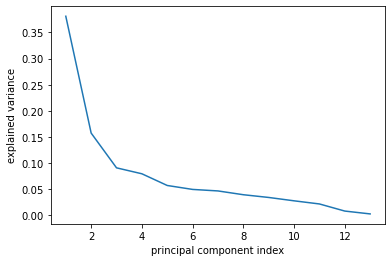

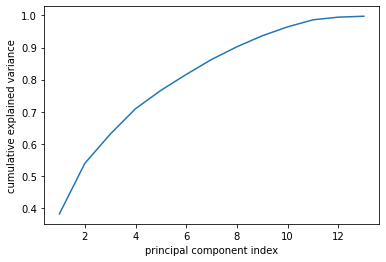

In [18]:
n_components = pca.components_.shape[0]

plt.plot(range(1, n_components+1), pca.explained_variance_ratio_)
plt.xlabel('principal component index')
plt.ylabel('explained variance')

plt.show()

plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal component index')
plt.ylabel('cumulative explained variance')

plt.show()

## Question 2
Use the provided function `plot_PCA_component()` to visualize the principal components you want to keep, given your answer to Part 1.

In [19]:
# takes in a 1-D array describing a principal component and makes a labeled bar chart
def plot_PCA_component(component):
    plt.barh(range(len(columns)), component)
    plt.xlabel('feature weight')
    plt.yticks(range(len(columns)), columns)
    plt.show()

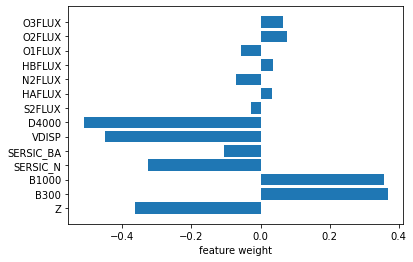

In [26]:
plot_PCA_component(pca.components_[1])

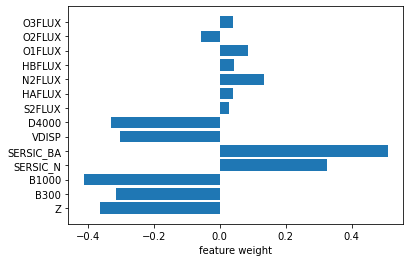

In [27]:
plot_PCA_component(pca.components_[2])

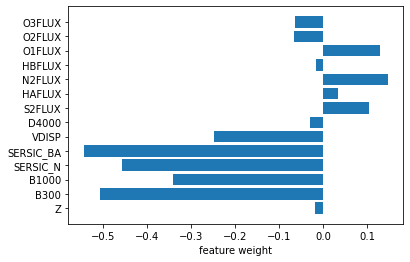

In [28]:
plot_PCA_component(pca.components_[3])

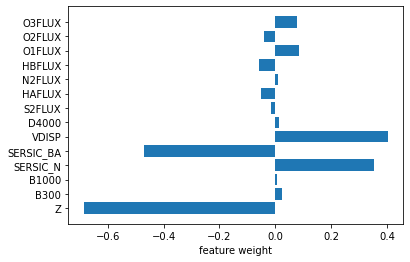

In [29]:
plot_PCA_component(pca.components_[4])

## Question 3
You can find a short description of each feature on the NASA-Sloan webpage: http://www.nsatlas.org/data

What features contribute the most to the first principal component? What do these features have in common? How might we want to pre-process the data to make the first principal component more informative?

B1000, B300 are the most dominant features where B1000 is Star-formation rate b-parameter for last 1 Gyrs  and B300 is the same thing over 300Myr. They are both star formation parameters. We should normalize to similar brightness

## Question 4
What features are most important to the second principal component? What types of galaxies would have a large positive value or large negative value of the second PCA coefficient?

*Hints:*
- elliptical galaxies tend to have large Sersic index, spiral galaxies tend to have small Sersic index
- massive galaxies tend to have greater VDISP
- galaxies with more red stars will have lower D4000, while those with more blue stars will have lower D4000
- B300 and B1000 measure recent star formation

SERSIC_BA, SERSIC_N are the most dominant features. Given that the weights are higher for them elliptical galaxies would have a large positive value of the second PCA coefficient.